### 前処理

In [1]:
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import matplotlib.pyplot as plt

In [2]:
#現在の最大表示行数の出力
pd.set_option("display.max_rows",3000)
#カラム内の文字数。デフォルトは50だった
pd.set_option("display.max_colwidth", 80)

In [3]:
pwd()

'C:\\Users\\tamon\\Desktop\\RBS\\jupyter'

In [4]:
#データ読み込み
input_R1= pd.read_csv('../raw_data/200714/in_S1_L001_R1_001.fastq',header=None)
input_R2= pd.read_csv('../raw_data/200714/in_S1_L001_R2_001.fastq',header=None)
output_R1= pd.read_csv('../raw_data/200714/out_S2_L001_R1_001.fastq',header=None)
output_R2= pd.read_csv('../raw_data/200714/out_S2_L001_R2_001.fastq',header=None)

input_R1.head(12)

,0
0,@M01347:246:000000000-J8JP8:1:1101:15530:1342 1:N:0:1
1,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAAGTCATTAAA...
2,+
3,AAAAAF1D1DFFGGGGBGDG3F1EE0EEFF1BFFGHBGHBFBFACFEFDB1FGFHECG/E0BFBE@//?1BDGHF1...
4,@M01347:246:000000000-J8JP8:1:1101:15584:1352 1:N:0:1
5,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
6,+
7,AAAA11BD1BFFFDGCGGGGGGGGAEAEHFHGFFHHHHHHHCHGFHHGHHHHEAFEEEGGHHHHEEEGHGHHHHHH...
8,@M01347:246:000000000-J8JP8:1:1101:16314:1373 1:N:0:1
9,GGATACAATTGACATTGTGAGCGGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGA...


In [5]:
#配列のみをそれぞれ取り出す
def Sequence(x):
    x_data = x[1:len(x)+1:4].reset_index()
    x_data = x_data.drop('index',axis=1)
    x_data = x_data.rename(columns={0:'seq'})
    
    return x_data

input_R1_data = Sequence(input_R1)
input_R2_data = Sequence(input_R2)
output_R1_data = Sequence(output_R1)
output_R2_data = Sequence(output_R2)

In [6]:
output_R2_data

,seq
0,AGAGCCGAATAGCCTCTCCACCCACGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGGACCTTAC...
1,ATAGCCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTTGC...
2,ATAGCCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTCAA...
3,TATTTTAAAGCGCCGTGGATGCCTGACCGTACCGAGGCTAACCCTAATGAGCTTAATCAAGATGATGCTCGTTATG...
4,ATAGCCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTTCG...
...,...
1950078,ATAGGCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTTAA...
1950079,TGAATATTAGACATAATTTATCCTCAAGTAAGGGGCCGAAGCCCCTGCAATTAAAATTGTTGACCACCTACATACC...
1950080,AATTCGTAAACAAGCAGTAGTAATTCCTGCTTTAGCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTT...
1950081,GGAGCAGTCCAAATGCTTTTGAGATGACAGCAACGGAAACCATAACGAGCATCATCTTGATTAAGCTCATTAGGGT...


In [7]:
# # 一番biopythonを使う
# # DNAでもRNAでも使える
# from Bio.Seq import Seq

# seq='ATGCatgc--Nn'
# seq_c=str(Seq(seq).reverse_complement())

# print(seq_c)

In [8]:
#BioPythonでR2を相補鎖にする(相補鎖にして逆にする)
input_R2_data['seq_comp'] = input_R2_data['seq'].map(lambda x:str(Seq(x).reverse_complement()))
output_R2_data['seq_comp'] = output_R2_data['seq'].map(lambda x:str(Seq(x).reverse_complement()))

#seqカラムを消去
comp_in_R2 = input_R2_data.drop('seq',axis=1)
comp_out_R2 = output_R2_data.drop('seq',axis=1)

In [9]:
input_R1_data.head()

,seq
0,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAAGTCATTAAA...
1,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
2,GGATACAATTGACATTGTGAGCGGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGA...
3,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
4,GGATAACAATTGACATTATGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCGTACCA...


In [10]:
output_R1_data.head()

,seq
0,TGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
1,GGATAACTATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
2,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
3,GTTCCATCAACATCATAGCCAGATGCCCAGAGATTAGAGCGCATGACAAGTAAAGGACGGTTGTCAGCGTCATAAG...
4,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...


In [11]:
#RBS配列を取り出す
def Index(x,pre_seq):
    index = str(x).find(pre_seq)
    
    return index

def RBS(seq,clumns):
    pre_seq = 'ATTAAAG'
    seq['rbs_seq'] = seq[clumns].map(lambda x:str(x)[Index(x,pre_seq)+len(pre_seq):Index(x,pre_seq)+len(pre_seq)+7])
    seq = seq.drop(clumns,axis=1)
    
    return seq

input_R1_rbs = RBS(input_R1_data,'seq')
input_R2_rbs = RBS(comp_in_R2,'seq_comp') 
output_R1_rbs = RBS(output_R1_data,'seq') 
output_R2_rbs = RBS(comp_out_R2,'seq_comp') 

In [12]:
output_R2_rbs

,rbs_seq
0,GTTGGTA
1,ACGGGCA
2,ATCGTTG
3,GGCGAGA
4,GAGACGA
...,...
1950078,TACATTA
1950079,CTGGCGC
1950080,GCGCGCT
1950081,TTCAGGG


In [13]:
#columnsの名前を変える
input_R1_rbs.rename(columns={'rbs_seq':'in_R1_rbs'},inplace=True)
input_R2_rbs.rename(columns={'rbs_seq':'in_R2_rbs'},inplace=True)
output_R1_rbs.rename(columns={'rbs_seq':'out_R1_rbs'},inplace=True)
output_R2_rbs.rename(columns={'rbs_seq':'out_R2_rbs'},inplace=True)

In [14]:
#R1,R2の共通の配列を取り出す
input_rbs = pd.concat([input_R1_rbs,input_R2_rbs],axis=1)
output_rbs = pd.concat([output_R1_rbs,output_R2_rbs],axis=1)

input_rbs = input_rbs['in_R1_rbs'][input_rbs['in_R1_rbs'] == input_rbs['in_R2_rbs']].reset_index().drop('index',axis=1)
output_rbs = output_rbs['out_R1_rbs'][output_rbs['out_R1_rbs'] == output_rbs['out_R2_rbs']].reset_index().drop('index',axis=1)

In [15]:
output_rbs

,out_R1_rbs
0,GTTGGTA
1,ACGGGCA
2,ATCGTTG
3,GAGACGA
4,CCTTTTG
...,...
1497209,TATACAG
1497210,GTGTGTT
1497211,GGCAATC
1497212,ATGCGGA


In [207]:
#in,outの読み取り回数取得
input_count = input_rbs.value_counts()
output_count = output_rbs.value_counts()

input_count_data = pd.DataFrame(input_count)
output_count_data = pd.DataFrame(output_count)

count = pd.concat([input_count_data,output_count_data],axis=1)
count.columns = ['in','out']

count.dropna(inplace=True)

#outputが90以上のものを採択
count = count[count['out'] >= 90]

In [208]:
#翻訳効率を出す
count['translation_rate'] = np.log2(count['out'] / count['in'])

In [209]:
#翻訳効率が0より小さいデータ
count[count['translation_rate']<0].head(3)

,in,out,translation_rate
AAACCTC,192.0,130.0,-0.562595
AAACGTA,222.0,151.0,-0.556011
AAATAAA,273.0,168.0,-0.700440


In [210]:
#翻訳効率が5より大きいデータ
count[(count['translation_rate']>5)].head(3)

,in,out,translation_rate
AATGTGG,2.0,104.0,5.700440
ATGCGGA,174.0,49296.0,8.146239
CCTTTTG,12.0,9565.0,9.638587


In [211]:
# #翻訳効率4～5のものは4とする
# count['translation_rate'][(4 <= count['translation_rate']) & (count['translation_rate'] <= 5)] = 4

# #翻訳効率が0～4のものを採択
# count = count[(0 <= count['translation_rate']) & (count['translation_rate'] <= 4)]

In [212]:
#前配列を考慮
pre_seq = 'GACCGAATTCATTAAAG'
pre_seq_rev = pre_seq[::-1]
pre_seq_list = []
for i in range(len(pre_seq)-7+1):
    count[pre_seq_rev[i:i+7]] = pre_seq_rev[i:i+7]
    pre_seq_list.append(pre_seq_rev[i:i+7])
    
print(pre_seq_list)    

#indexを'seq'にする
count = count.rename_axis('seq').reset_index()
count.head()

['GAAATTA', 'AAATTAC', 'AATTACT', 'ATTACTT', 'TTACTTA', 'TACTTAA', 'ACTTAAG', 'CTTAAGC', 'TTAAGCC', 'TAAGCCA', 'AAGCCAG']


,seq,in,out,translation_rate,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG
0,AAAAAGA,110.0,305.0,1.471306,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG
1,AAAACAC,189.0,357.0,0.917538,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG
2,AAAACTG,77.0,439.0,2.511291,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG
3,AAAACTT,106.0,108.0,0.026967,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG
4,AAAAGGT,208.0,1331.0,2.677855,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG


In [213]:
#マッチングの数を算出
def comfirm_match(row,base):
    seq = row['seq']
    match_source = row[base]
    match_count = 0
    for s,ms in zip(seq,match_source):
        match_count += int(s==ms)
    
    return match_count

match_count = count.copy()

for i in range(len(pre_seq)-7+1):
    match_count[pre_seq_list[i]] = match_count.apply(comfirm_match,base=pre_seq_list[i],axis=1)

match_count.head()

,seq,in,out,translation_rate,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG
0,AAAAAGA,110.0,305.0,1.471306,4,3,3,2,2,2,2,3,2,3,2
1,AAAACAC,189.0,357.0,0.917538,3,5,2,3,1,2,2,2,3,3,4
2,AAAACTG,77.0,439.0,2.511291,4,3,2,4,2,1,2,1,2,3,4
3,AAAACTT,106.0,108.0,0.026967,4,3,3,5,2,1,1,1,2,3,3
4,AAAAGGT,208.0,1331.0,2.677855,3,3,3,3,1,1,1,2,3,2,2


In [216]:
match_count.to_csv('../input/train_data_context.csv', index=False)

In [214]:
#マッチが3より小さいものは捨てる
match_count_only = match_count.iloc[:,4:]
match_count_only[match_count_only<=2] = 0
# match_count_only[(match_count_only==3) | (match_count_only==6)] = 1
# match_count_only[(match_count_only==4) | (match_count_only==5)] = 2
# match_count_only

match_count.iloc[:,4:] = match_count_only

In [215]:
match_count['match_mean'] = match_count.iloc[:,4:].mean(axis=1)
match_count['match_max'] = match_count.iloc[:,4:31].max(axis=1)
match_count

,seq,in,out,translation_rate,GAAATTA,AAATTAC,AATTACT,ATTACTT,TTACTTA,TACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG,match_mean,match_max
0,AAAAAGA,110.0,305.0,1.471306,4,3,3,0,0,0,0,3,0,3,0,1.454545,4.0
1,AAAACAC,189.0,357.0,0.917538,3,5,0,3,0,0,0,0,3,3,4,1.909091,5.0
2,AAAACTG,77.0,439.0,2.511291,4,3,0,4,0,0,0,0,0,3,4,1.636364,4.0
3,AAAACTT,106.0,108.0,0.026967,4,3,3,5,0,0,0,0,0,3,3,1.909091,5.0
4,AAAAGGT,208.0,1331.0,2.677855,3,3,3,3,0,0,0,0,3,0,0,1.363636,3.0
5,AAAATAA,69.0,100.0,0.535332,5,5,0,0,3,4,0,0,0,3,3,2.090909,5.0
6,AAAATTT,63.0,98.0,0.637430,5,4,3,4,3,0,0,0,0,0,0,1.727273,5.0
7,AAACAGA,84.0,266.0,1.662965,3,3,3,0,3,0,0,0,0,3,3,1.636364,3.0
8,AAACCTC,192.0,130.0,-0.562595,3,4,0,3,3,0,0,0,0,3,4,1.818182,4.0
9,AAACGTA,222.0,151.0,-0.556011,4,3,0,0,4,0,0,0,0,3,3,1.545455,4.0


In [204]:
print('全体の平均マッチスコア：',match_count['match_max'].mean(axis=0))

全体の平均マッチスコア： 13.904805914972274


In [205]:
high_seq = match_count.sort_values(by='translation_rate',ascending=False)
high_seq = high_seq[high_seq['translation_rate']>=2]
high_seq
print('翻訳効率が高いほうの平均マッチスコア：',high_seq['match_max'].mean(axis=0))

翻訳効率が高いほうの平均マッチスコア： 14.425742574257425


In [206]:
low_seq = match_count.sort_values(by='translation_rate')
low_seq = low_seq[low_seq['translation_rate']<=0]
print('翻訳効率が低いほうの平均マッチスコア：',low_seq['match_max'].mean(axis=0))

翻訳効率が低いほうの平均マッチスコア： 14.194078947368421


In [65]:
#マッチングを1,0であらわす
def comfirm_match(row,base):
    seq = row['seq']
    match_source = row[base]
    match = [str(int(s==ms)) for s,ms in zip(seq,match_source)]
    return ''.join(match)

for i in range(len(pre_seq)-7+1):
    count[pre_seq_list[i]] = count.apply(comfirm_match,base=pre_seq_list[i],axis=1)

count.head()

,seq,in,out,translation_rate,GGACTTA,GACTTAA,ACTTAAG,CTTAAGC,TTAAGCC,TAAGCCA,AAGCCAG
0,AAAAAGA,110.0,305.0,1.471306,0010001,0100001,1000100,0001110,0011000,0110001,1100000
1,AAAACAC,189.0,357.0,0.917538,0010000,0100010,1000010,0001001,0011001,0110100,1100110
2,AAAACTG,77.0,439.0,2.511291,0010010,0100000,1000001,0001000,0011000,0110100,1100101
3,AAAACTT,106.0,108.0,0.026967,0010010,0100000,1000000,0001000,0011000,0110100,1100100
4,AAAAGGT,208.0,1331.0,2.677855,0010000,0100000,1000000,0001010,0011100,0110000,1100000


In [66]:
# #後配列を考慮
# beh_seq = 'ATGATTGAACAAGATGGATTGCACGCAGG'
# beh_seq_rev = beh_seq[::-1]
# beh_seq_list = []
# for i in range(len(beh_seq)-7+1):
#     count[beh_seq_rev[i:i+7]] = beh_seq_rev[i:i+7]
#     beh_seq_list.append(beh_seq_rev[i:i+7])
    
# print(beh_seq_list)    

In [67]:
# #マッチングを1,0であらわす
# def comfirm_match(row,base):
#     seq = row['seq']
#     match_source = row[base]
#     match = [str(int(s==ms)) for s,ms in zip(seq,match_source)]
#     return ''.join(match)

# for i in range(len(beh_seq)-7+1):
#     count[beh_seq_list[i]] = count.apply(comfirm_match,base=beh_seq_list[i],axis=1)

# count.head()


# +(len(beh_seq)-7+1)

In [68]:
#文字列を数字のリストにする

X = count.iloc[:,4:].values
X
A = []
B = []
C = []
for a in range(len(X)):
    for b in range((len(pre_seq)-7+1)):
        A.append(int(list(X[a,b])[0]))
        A.append(int(list(X[a,b])[1]))
        A.append(int(list(X[a,b])[2]))
        A.append(int(list(X[a,b])[3]))
        A.append(int(list(X[a,b])[4]))
        A.append(int(list(X[a,b])[5]))
        A.append(int(list(X[a,b])[6]))
        
        B.append(A) 
        A=[]
    C.append(B) 
    B=[]
      
    
np.array(C).shape

(1555, 7, 7)

In [69]:
pwd()

'C:\\Users\\tamon\\Desktop\\RBS\\jupyter'

In [70]:
# count.to_csv('../input/train_data_context.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

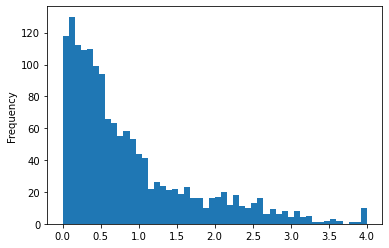

In [71]:
count['translation_rate'].plot(kind='hist',bins=50)

### モデル構築

In [72]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras import optimizers
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import scipy
import scipy.stats
import csv



from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
import tensorflow as tf
import numpy as np
import random
import os

def set_seed(seed=200):
    tf.random.set_seed(seed)

    # optional
    # for numpy.random
    np.random.seed(seed)
    # for built-in random
    random.seed(seed)
    # for hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)

In [74]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1527249616833524298
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 472510293594433329
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9764978688
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3381030572557258107
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13251914780312301100
physical_device_desc: "device: XLA_GPU device"
]


In [75]:
#目的変数と説明変数の設定
X_train = count['seq']
Y_train = count['translation_rate']
X_tr = np.array(C)
Y_tr = Y_train.values

In [81]:
#モデル構築
def build_model():
    model = Sequential()
    #layer1
    model.add(Conv1D(filters=7, kernel_size=1, strides=1,activation="linear", input_shape=(len(pre_seq)-7+1,7), name = 'layer1'))
    model.add(Dropout(0.15))

    #layer2
    model.add(Conv1D(filters=24, kernel_size=7, strides=1,activation="linear", name = 'layer2'))
    model.add(Dropout(0.15))
#     model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())

    #layer3
    model.add(Dense(units=64, activation="relu"))

    #layer4
    model.add(Dense(units = 1))

    # compile the model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics = ['mean_squared_error'])
    
    return model


In [82]:
# model
model = build_model()

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv1D)              (None, 7, 7)              56        
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7)              0         
_________________________________________________________________
layer2 (Conv1D)              (None, 1, 24)             1200      
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 24)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1600      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [87]:
#クロスバリデーション
index = 0
set_seed(0)

# loss
train_loss = []
val_loss = []

# validation result
val_seq = []
val_predict = []
val_label = []

# correlation
train_correlation = []
val_correlation = []

In [88]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
for train_index, val_index in kf.split(X_train):
    x_train, x_val = X_tr[train_index], X_tr[val_index]
    y_train, y_val = Y_tr[train_index], Y_tr[val_index]
    
    # shuffle train data
    for l in [x_train, y_train]:
        np.random.seed(1)
        np.random.shuffle(l)  
    
    model_weights = "weight/seq_context/regression_model[%d].h5" % index
    index = index+1

    
    # callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10 , verbose=1)
    checkpointer = ModelCheckpoint(model_weights, monitor='val_loss', verbose=0, save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,min_lr=0.0001)
    
   
    
    
    # model
    model = build_model()
    
    # run
    history = model.fit(x_train, y_train, batch_size=2, 
              epochs = 100, verbose=0, 
              validation_data=(x_val, y_val),
              callbacks=[early_stopping, checkpointer, reduce_lr])
    
    # save log
    # loss
    train_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
    
    # validation result
    val_seq.extend([X_train[val_index[i]] for i in range(len(val_index))])
    val_predict.extend([x[0] for x in model.predict(x_val, verbose=1)])
    val_label.extend(y_val)
    
    # train correlation
    train_correlation.append(scipy.stats.pearsonr(y_train.flatten(), model.predict(x_train, verbose=1).flatten())[0]**2)
                   
    # validation correlation
    val_correlation.append(scipy.stats.pearsonr(y_val.flatten(), model.predict(x_val, verbose=1).flatten())[0]**2)
 
print(train_correlation)
print('学習データに対する決定係数:',sum(train_correlation)/10)

print(val_correlation)
print('評価データに対する決定係数:',sum(val_correlation)/10)

Epoch 00054: early stopping
5/5 [==============================] - 0s 798us/step
Epoch 00013: early stopping
5/5 [==============================] - 0s 812us/step
Epoch 00038: early stopping
5/5 [==============================] - 0s 998us/step
Epoch 00023: early stopping
5/5 [==============================] - 0s 798us/step
Epoch 00041: early stopping
5/5 [==============================] - 0s 998us/step
Epoch 00015: early stopping
5/5 [==============================] - 0s 996us/step
Epoch 00023: early stopping
5/5 [==============================] - 0s 998us/step
Epoch 00077: early stopping
5/5 [==============================] - 0s 1ms/step
Epoch 00015: early stopping
5/5 [==============================] - 0s 998us/step
Epoch 00036: early stopping
5/5 [==============================] - 0s 998us/step
[0.42063014836665724, 0.3928564395174579, 0.40374847673887015, 0.42505464814571486, 0.4330546668956936, 0.4296895620702357, 0.42469175462809594, 0.4610229352186666, 0.41829300840567113, 0.4252

### テストデータに対する予測

In [ ]:
pwd()

In [ ]:
test = pd.read_csv('../input/test.csv')
print(test.shape)

test.head()

In [ ]:
#前配列
for i in range(len(pre_seq)-7+1):
    test[pre_seq_rev[i:i+7]] = pre_seq_rev[i:i+7]
    pre_seq_list.append(pre_seq_rev[i:i+7])

for i in range(len(pre_seq)-7+1):
    test[pre_seq_list[i]] = test.apply(comfirm_match,base=pre_seq_list[i],axis=1)

# #後配列
# for i in range(len(beh_seq)-7+1):
#     test[beh_seq_rev[i:i+7]] = beh_seq_rev[i:i+7]
#     beh_seq_list.append(beh_seq_rev[i:i+7])
    
# for i in range(len(pre_seq)-7+1):
#     test[beh_seq_list[i]] = test.apply(comfirm_match,base=beh_seq_list[i],axis=1)  
    
test  

In [ ]:
#文字列を数字のリストにする

X_test = test.iloc[:,2:].values
X_test
A_test = []
B_test = []
C_test = []
for a in range(len(X_test)):
    for b in range((len(pre_seq)-7+1)):
        A_test.append(int(list(X[a,b])[0]))
        A_test.append(int(list(X[a,b])[1]))
        A_test.append(int(list(X[a,b])[2]))
        A_test.append(int(list(X[a,b])[3]))
        A_test.append(int(list(X[a,b])[4]))
        A_test.append(int(list(X[a,b])[5]))
        A_test.append(int(list(X[a,b])[6]))
        
        B_test.append(A_test) 
        A_test=[]
    C_test.append(B_test) 
    B_test=[]
      
    
np.array(C_test).shape  

In [ ]:
# put labels into y_train variable
Y_test = test["OD"]
# Drop 'OD' column
X_test = test["seq"]

X_te = np.array(C_test)
Y_te = Y_test.values

In [ ]:
test_correlation = []
test_predict = []

In [ ]:
test_predict

In [ ]:
# load saved weights and models
for index in range(10):
    model = load_model("weight/regression_model[%d].h5" % index, compile=False)
    
    test_predict.append([x[0] for x in model.predict(X_te, verbose=1)])
    test_correlation.append(scipy.stats.pearsonr(Y_te.flatten(), model.predict(X_te, verbose=1).flatten())[0]**2)

print(test_correlation)
print(sum(test_correlation)/10)